In [2]:
#This dataset represents a good database of books

#import pandas
import pandas as pd

#import numpy
import numpy as np

#import matplotlib.pyplot
import matplotlib.pyplot as plt

#for beautiful output
import seaborn as sns

In [2]:
# #graphs in svg look sharper
# %config InlineBackend.figure_format = 'svg'

# #increasing default size of graphs
# from pylab import rcParams
# rcParams['figure.figsize'] = 12, 8

In [3]:
#converting objects to int type
from sklearn.preprocessing import LabelEncoder

In [3]:
#reading data via pandas read_csv()
data = pd.read_csv("books.csv", delimiter=',')

In [5]:
#first 3 rows
data.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613.0
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390.0


In [6]:
data.describe()

,bookID,average_rating,# num_pages,ratings_count,text_reviews_count
count,13719.000000,1.371900e+04,13719.000000,1.371900e+04,13718.000000
mean,22160.579270,6.208883e+04,342.377141,1.775909e+04,533.478787
std,13699.603351,7.271888e+06,252.623382,1.129371e+05,2528.653867
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,10621.000000,3.770000e+00,196.000000,8.250000e+01,7.000000
50%,21322.000000,3.960000e+00,301.000000,6.300000e+02,40.000000
75%,33322.000000,4.130000e+00,421.000000,4.737000e+03,222.000000
max,47709.000000,8.517427e+08,6576.000000,5.629932e+06,93619.000000


#for each non-numerical (object, bool) column, the number of non-empty values (count)
#number of unique values (unique)
#the most frequent value (top)
#frequency (freq)

In [7]:
data.describe(include = 'object')

,title,authors,isbn,isbn13,language_code
count,13719,13719,13719,13719,13719
unique,12427,7605,13719,13719,31
top,'Salem's Lot,Agatha Christie,0751515574,9780310223214,eng
freq,11,69,1,1,10597


In [8]:
#columns basic features and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null float64
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null int64
ratings_count         13719 non-null int64
text_reviews_count    13718 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


In [9]:
# the number of unique non-NA values in a Series
data.nunique()

bookID                13719
title                 12427
authors                7605
average_rating          217
isbn                  13719
isbn13                13719
language_code            31
# num_pages            1090
ratings_count          6030
text_reviews_count     2024
dtype: int64

In [10]:
#there're some columns that won't be used
data = data.drop(labels = ['isbn', 'isbn13'], axis = 1)

In [4]:
#rename just for convenience
data.rename({'average_rating' : 'avr_rate',
             '# num_pages' : 'num_pages',
             'ratings_count' : 'ratings',
             'language_code' : 'language',
             'text_reviews_count' : 'text_reviews'}, axis = 'columns', inplace = 'True')

#using this dataset, you can predict the book with the highest rating due to different factors

D:\3 course\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


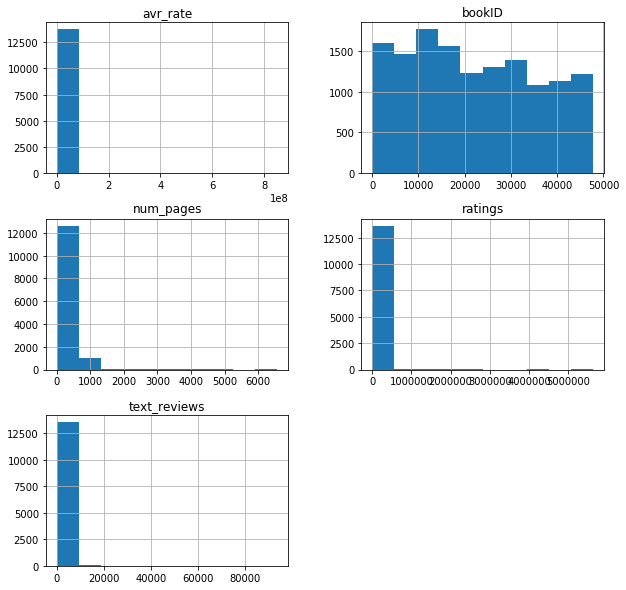

In [12]:
#plotting all possible histograms
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

In [13]:
data['avr_rate']

0        4.56
1        4.49
2        4.47
3        4.41
4        4.55
5        4.78
6        3.69
7        4.73
8        4.38
9        4.38
10       4.22
11       4.22
12       4.38
13       4.20
14       3.43
15       3.88
16       4.07
17       3.90
18       3.83
19       3.87
20       3.92
21       3.94
22       4.59
23       4.49
24       4.49
25       4.35
26       4.49
27       4.53
28       4.50
29       4.49
         ... 
13689    3.90
13690    3.93
13691    4.30
13692    3.59
13693    4.66
13694    3.89
13695    3.49
13696    3.87
13697    4.12
13698    4.30
13699    4.30
13700    4.27
13701    3.14
13702    3.33
13703    4.22
13704    4.27
13705    3.79
13706    4.11
13707    4.15
13708    3.71
13709    3.30
13710    4.11
13711    4.03
13712    3.79
13713    4.62
13714    3.82
13715    3.72
13716    3.53
13717    4.43
13718    4.29
Name: avr_rate, Length: 13719, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C8AE8A128>]],
      dtype=object)

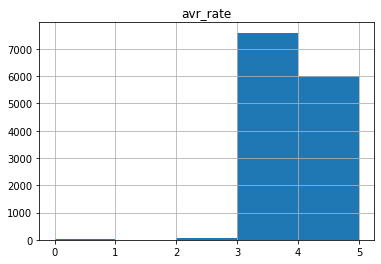

In [29]:
#histogram for average ratings
data.hist(column = 'avr_rate', bins = 5)

The histogram shows a frequency of average books rting in range from 0 to 5 
You can see that the center is near 4.
Most values in the dataset will be close to 3.9, and values further away are rarer. 
The distribution has bell shape and the values fall between approximately 3 and 4.8.

To determine outliers we can use 1.5 IQR Rule:
these are the values (Q1 - 25%, Q3 - 75%) taken from the table abow using data.describe()
IQR = (Q3 - Q1)* 1.5 = (4.13 - 3.77)* 1.5 = 0.36 * 1.5 = 0.54
Any value which are less than (Q1 - 1.5 IQR) are lower outliers, so
Q1 - 0.54 = 3.77 - 0.54 = 3.23 (cut-off value)
Accordingly, for upper outliers it will be equal to (Q3 + 1.5 IQR)
Q3 + 0.54 = 4.13 + 0.54 = 4.67 (cut-off value)

The distribution of average ratings of books is roughly symmetric distribution, but a little skewed to the left.

Mean value 3.93, median - 3.96, standart deviation - 0.36


In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
# contains a large number of probability distributions
from scipy import stats
import scipy.stats

In [5]:
#dropping data with NaN value
data = data.drop([10666])

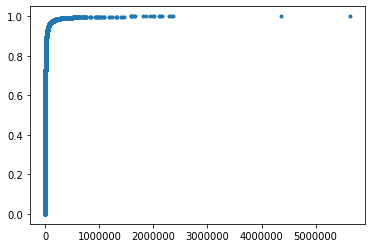

In [21]:
#plotting pmf for column "ratings"
x1 = np.sort(data['ratings'])
y1 = np.arange(1, len(x1) +1 ) / len(x1)
plt.plot(x1, y1, marker = '.', linestyle = 'none')

In [ ]:
#plotting pmf for column "text_reviews"
x2 = np.sort(data['text_reviews'])
y2 = np.arange(1, len(x2) +1 ) / len(x2)
plt2 = plt.plot(x2, y2, marker = '.', linestyle = 'none')

In [ ]:
#plotting pmf for column "avr_rate"
x3 = np.sort(data['avr_rate'])
y3 = np.arange(1, len(x3) +1 ) / len(x3)
plt3 = plt.plot(x3, y3, marker = '.', linestyle = 'none')

In [ ]:
#I tried to find smth in stackoverflow
pmf, bins = np.histogram(data.avr_rate, bins=range(0,11), density=True)

In [ ]:
#And found this 
np.column_stack((bins[:-1], pmf))

Let's plot it's PMF and CDF. We use a matplotlib property to plot three different plots using the same x-axis. Notice how the histogram approximates the PMF.

In the plots below, we take care to center the bars on the PMF and the histogram on the integers, but the jumps in the CDF are on the integers.

Also, we specify the bins for the histogram. The default number, 10 bins, can easily result in aliasing errors.

In [ ]:
#x is a Poisson variable
x = stats.poisson(data['ratings']) 

In [ ]:
x.pmf(arange(0,13718))

In [ ]:
n = arange(0,13718)

fig, axes = subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
# the 'where' keyword is optional, but 'mid' centers the plateaus on the integers
axes[0].step(n, x.pmf(n), where='mid')

# plot the commulative distribution function (CDF)
# don't shift the CDF.  The jumps should occur at the integers
axes[1].step(n, x.cdf(n))

# plot histogram of 13718 realizations of the stochastic variable X
# shifting the bins by 1 centers each bar on the integer values
axes[2].hist(x.rvs(size=13718), bins=arange(0,13718));

An alternative plot is a "stem" plot. 
The two plots look ugly together. 
Best to pick one. 
(I'm not sure how to fix the "step" plot so the first bar is full sized, not half sized as it is now.)

In [ ]:
stem(n, x.pmf(n),'r')
step(n, x.pmf(n), where='mid')

In [ ]:
# poission distribution
x.mean(), x.std(), x.var()

In [ ]:
#y is a Poisson variable
y = stats.poisson(data['text_reviews']) 

In [ ]:
y.pmf(arange(0,13718))

In [ ]:
m = arange(0,13718)

fig, axes = subplots(3,1, sharex=True)

axes[0].step(m, y.pmf(m), where='mid')

axes[1].step(m, y.cdf(m))

axes[2].hist(y.rvs(size=13718), bins=arange(0,13718));

In [ ]:
stem(m, y.pmf(m),'r')
step(m, y.pmf(m), where='mid')

In [ ]:
# poission distribution
y.mean(), y.std(), y.var()

In [ ]:
#z is a Poisson variable
z = stats.poisson(data['avr_rate']) 

In [ ]:
z.pmf(arange(0,13718))

In [ ]:
k = arange(0,13718)

fig, axes = subplots(3,1, sharex=True)

axes[0].step(k, z.pmf(k), where='mid')

axes[1].step(k, z.cdf(k))

axes[2].hist(z.rvs(size=13718), bins=arange(0,13718));

In [ ]:
stem(k, z.pmf(k),'r')
step(k, z.pmf(k), where='mid')

In [ ]:
# poission distribution
z.mean(), z.std(), z.var()

# LABORATORY WORK 3
# CHAPTERS 5-6

The exponential distribution: CDF(x) = 1−e^−λx

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

D:\3 course\anaconda\lib\site-packages\pandas\plotting\_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


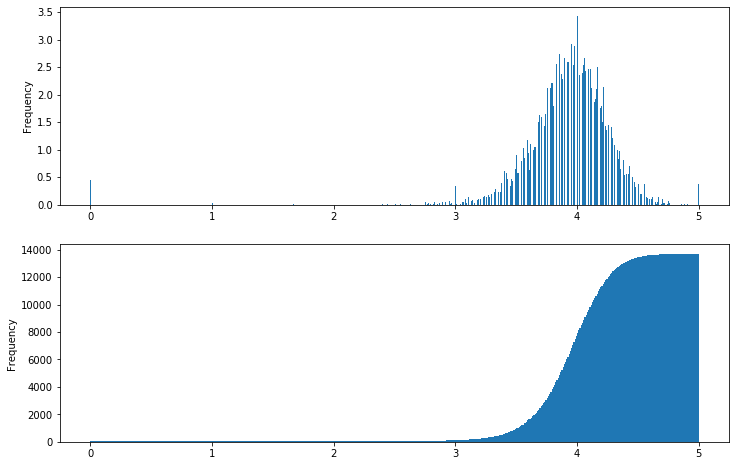

In [7]:
#NORMAL DISTRIBUTION
#for column "avr_rate"
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,8))
# Plot the PDF
data['avr_rate'].plot(ax = axes[0], kind = 'hist', normed = True, bins = 900, range = (0, 5))
# Plot the CDF
data['avr_rate'].plot(ax = axes[1], kind = 'hist', cumulative = True, bins = 10000, range = (0, 5))

In [ ]:
useful_cols = ['avr_rate', 'ratings', 'text_reviews']

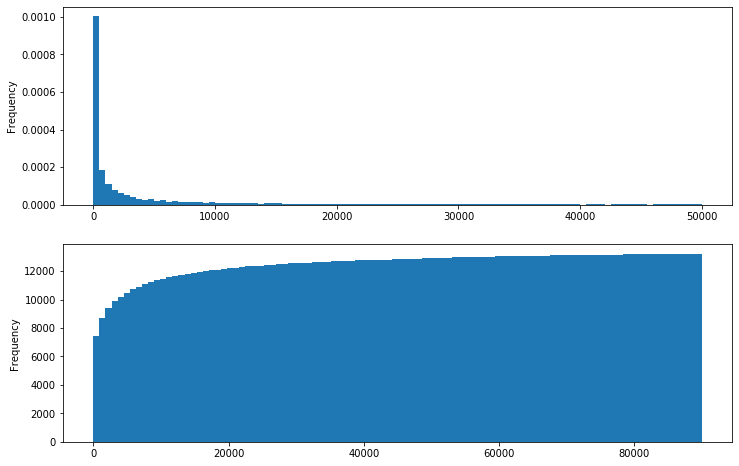

In [15]:
#NORMAL DISTRIBUTION
#for column "ratings"
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,8))
# Plot the PDF
data['ratings'].plot(ax = axes[0], kind = 'hist', normed = True, bins = 100, range = (0, 50000))
# Plot the CDF
data['ratings'].plot(ax = axes[1], kind = 'hist', cumulative = True, bins = 100, range = (0, 90000))

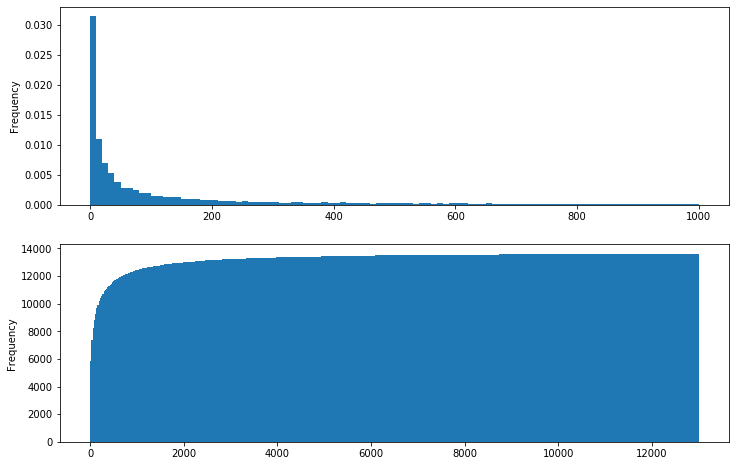

In [16]:
#NORMAL DISTRIBUTION
#for column "text_reviews"
fig, axes = plt.subplots(nrows=2, ncols=1, figsize= (12,8))
# Plot the PDF
data['text_reviews'].plot(ax = axes[0], kind = 'hist', normed = True, bins = 100, range = (0, 1000))
# Plot the CDF
data['text_reviews'].plot(ax = axes[1], kind = 'hist', cumulative = True, bins = 500, range = (0, 13000))

In [19]:
#the distribution of heights is roughly normal with parameters µ = 3.93 cm and σ = 0.36
mu = 3.93
sigma = 0.36
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [ ]:
dist.mean(), dist.std()

In [ ]:
dist.cdf(mu - sigma)

In [20]:
low = dist.cdf(1.22)    # 5 - highest average rating
high = dist.cdf(4.89)   # 0 - lowest average rating
low, high, high -low

(2.580556487669266e-14, 0.9961696194324102, 0.9961696194323845)

In [21]:
#Pareto
alpha = 5
xmin = 1
dist = scipy.stats.pareto(b = alpha, scale = xmin)
dist.median()

1.148698354997035

In [22]:
#mean in Pareto world
dist.mean()

1.25

In [ ]:
#the fraction of ratings are shorter than the mean
dist.cdf(dist.mean())

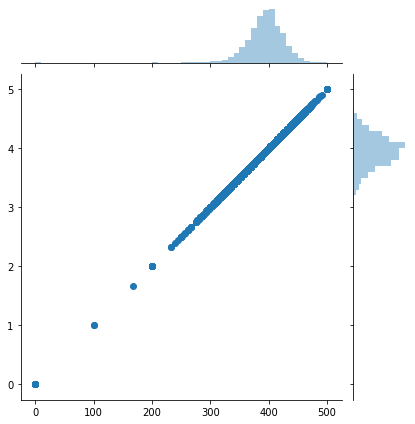

In [23]:
#CCDF
col_1 = list(data['avr_rate'])
col_2 = list(data['avr_rate']/0.01)

sns.jointplot(x=col_2, y=col_1)

In [ ]:
avr = data['avr_rate']

In [ ]:
avr.skew()

In [ ]:
#a measure of -3.669112125508889, meaning it's skewed to the left.

In [ ]:
#Pearson’s Median Skewness
P = (3 * (avr.mean() - avr.median()))/avr.std()
P

In [ ]:
#a pearson median coefficient of -0.24686488471150858, meaning it's left skewed

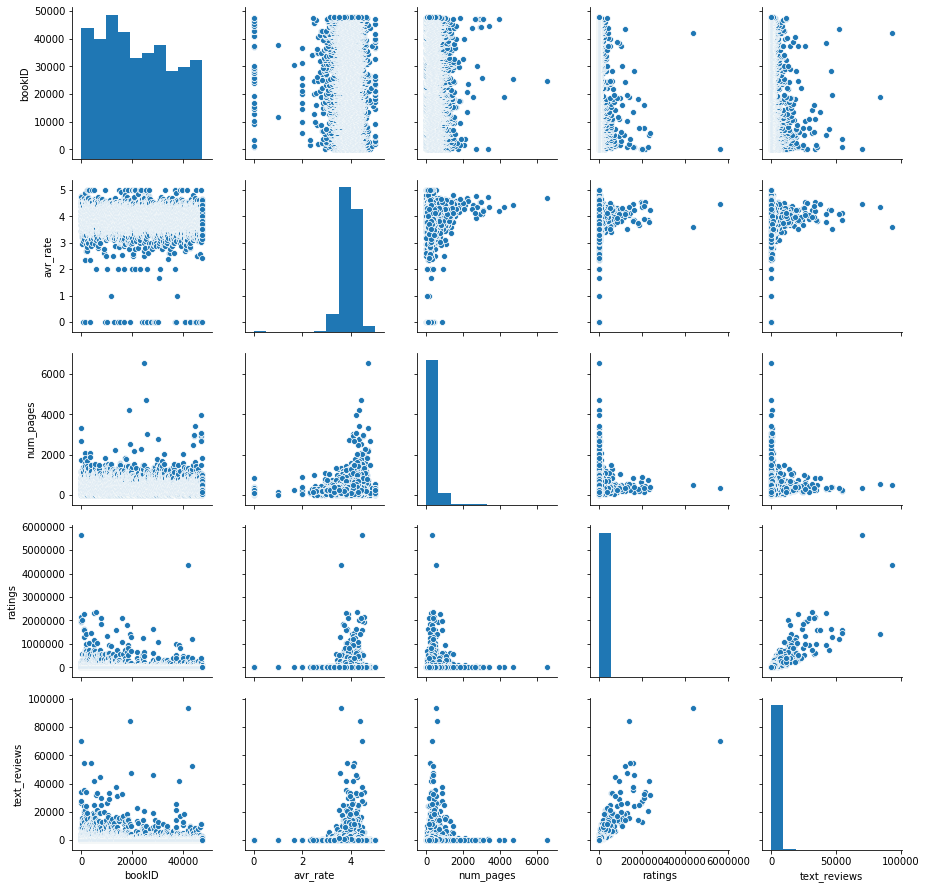

In [25]:
sns_plot = sns.pairplot(data)